In [67]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
import seaborn as sns

In [68]:
data = []
labels = []
file_name = []
class_names = []
# Load images from dataset folder
for sub_folder in os.listdir("dataset/"):
    sub_folder_files = os.listdir(os.path.join("dataset/", sub_folder))
    for i, filename in enumerate(sub_folder_files):
        img_path = os.path.join("dataset/", sub_folder, filename)
        img = cv.imread(img_path)
        img = img.astype(np.uint8)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        img = cv.resize(img, (256, 256))

        data.append(img)
        labels.append(sub_folder)
        name = os.path.splitext(filename)[0]
        file_name.append(filename)
# for sub_folder in os.listdir("dataset\\"):
#     sub_folder_files = os.listdir(os.path.join("dataset\\", sub_folder))
#     for i, filename in enumerate(sub_folder_files):
#         img_path = os.path.join("dataset\\", sub_folder, filename)
#         img = cv.imread(img_path)
#         img = img.astype(np.uint8)
#         img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#         img = cv.resize(img, (256, 256))

#         data.append(img)
#         labels.append(sub_folder)
#         name = os.path.splitext(filename)[0]
#         file_name.append(filename)
        
# data = np.array(data)
# labels = np.array(labels)


In [69]:
data_augmented = []
labels_augmented = []
paths_augmented = []
file_name_augmented = []
for i in range(len(data)):
	pass

In [70]:
print("Data sebelum augmentasi: ", len(data))
print("Data setelah augmentasi: ", len(data_augmented))

Data sebelum augmentasi:  396
Data setelah augmentasi:  0


In [71]:
def convolution(img, kernel):
    size = kernel.shape[0]
    pad_size = size // 2
    padded = np.pad(img, pad_size, mode='constant', constant_values=0)
    canvas = np.zeros_like(img).astype(np.float32)
    height, width = img.shape
    for i in range(height):
        for j in range(width):  
            region = padded[i:i+size, j:j+size]
            canvas[i, j] = np.sum(region * kernel)
    return canvas

def edge(img, kernelx, kernely):
    gx = convolution(img, kernelx)
    gy = convolution(img, kernely)
    canvas = np.abs(gx) + np.abs(gy)
    
    max_val = np.max(canvas)
    if max_val > 0:
        canvas = canvas * 255.0 / max_val
        
    return np.clip(canvas, 0, 255).astype(np.uint8)

# Kernel-kernel 
sobelx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)
sobely = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1,-2,-1]
], dtype=np.float32)
# prewittx = np.array([
#     [-1, 0, 1],
#     [-1, 0, 1],
#     [-1, 0, 1]
# ], dtype=np.float32)
# prewitty = np.array([
#     [1, 1, 1],
#     [0, 0, 0],
#     [-1, -1, -1]
# ], dtype=np.float32)
# robertsx = np.array([
#     [1, 0],
#     [0, -1],
# ], dtype=np.float32)
# robertsy = np.array([
#     [0, 1],
#     [-1, 0],
# ], dtype=np.float32)

In [72]:
dataPreprocessed = []
for img in data:
    processed = edge(img, sobelx, sobely)
    dataPreprocessed.append(processed)



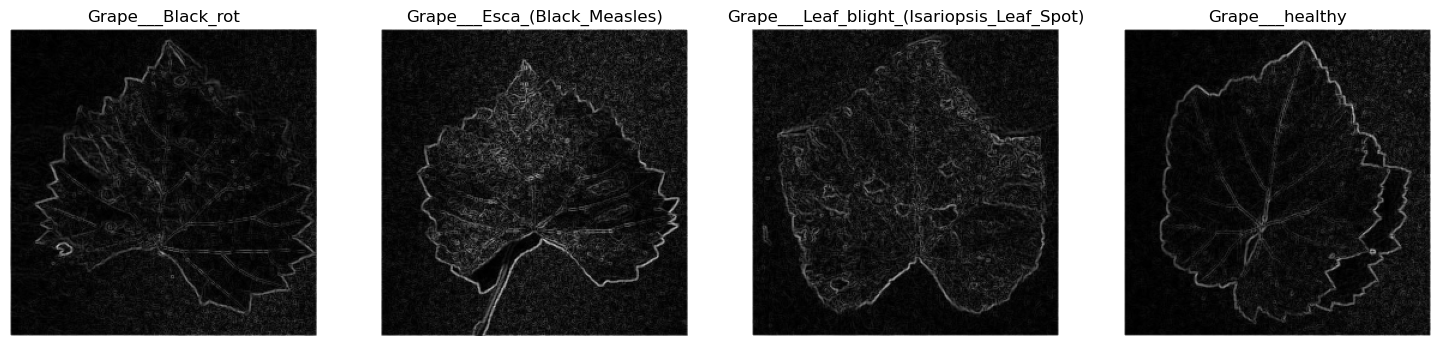

In [73]:

def show_sample_images(images, labels, class_names):
    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names):
        class_images = images[labels == class_name]
        if len(class_images) > 0:
            plt.subplot(3, 4, i + 1)
            plt.imshow(cv.cvtColor(class_images[10], cv.COLOR_BGR2RGB))
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_images(np.array(dataPreprocessed), np.array(labels), np.unique(labels))

In [74]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    # mengembalikan matrix glcm dari image
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

In [75]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

In [76]:
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

In [77]:
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

In [78]:
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

In [79]:
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

In [80]:
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

In [81]:
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

In [82]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(dataPreprocessed)):
    D0 = glcm(dataPreprocessed[i], 0)
    D45 = glcm(dataPreprocessed[i], 45)
    D90 = glcm(dataPreprocessed[i], 90)
    D135 = glcm(dataPreprocessed[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

In [83]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []


In [84]:
for i in range(len(dataPreprocessed)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)

In [85]:
for i in range(len(data)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)

In [86]:
for i in range(len(data)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

In [87]:
for i in range(len(data)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)

In [88]:
for i in range(len(data)):  
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)

In [89]:
for i in range(len(data)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

In [90]:
for i in range(len(data)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

In [91]:
dataTable = {'Filename': file_name, 'Label': labels,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_1.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_1.csv')
hasilEkstrak


,Filename,Label,Contrast0,Contrast45,Contrast90,Contrast135,Homogeneity0,Homogeneity45,Homogeneity90,Homogeneity135,...,ASM90,ASM135,Energy0,Energy45,Energy90,Energy135,Correlation0,Correlation45,Correlation90,Correlation135
0,003d09ef-e16c-4e8a-badf-847d46cb3dc0___FAM_B.R...,Grape___Black_rot,322.759574,527.345483,375.561673,580.713310,0.142768,0.124032,0.134618,0.117330,...,0.001219,0.001095,0.035782,0.033789,0.034914,0.033093,0.662741,0.389296,0.607315,0.327578
1,00cab05d-e87b-4cf6-87d8-284f3ec99626___FAM_B.R...,Grape___Black_rot,666.261198,891.443414,611.365778,1060.951711,0.092480,0.083112,0.095960,0.077663,...,0.000493,0.000421,0.021945,0.021213,0.022211,0.020526,0.596731,0.422688,0.632272,0.312942
2,00cff577-afd4-4e36-ac9c-a52aa6ae5949___FAM_B.R...,Grape___Black_rot,554.162684,778.001938,496.984697,838.039554,0.100519,0.092113,0.101990,0.089691,...,0.000595,0.000539,0.024227,0.023294,0.024398,0.023209,0.582751,0.361637,0.630607,0.312171
3,01d4aa8b-cc91-4475-b80c-b5b0ca10f1f6___FAM_B.R...,Grape___Black_rot,256.162607,459.236278,281.384559,478.291457,0.179840,0.154114,0.180064,0.152371,...,0.002109,0.001854,0.045856,0.043064,0.045925,0.043054,0.671334,0.271862,0.629221,0.241440
4,02a1df6c-97ec-41d4-b00c-9510741a39dc___FAM_B.R...,Grape___Black_rot,562.378385,803.250181,470.394730,724.536455,0.085300,0.076624,0.088574,0.078983,...,0.000576,0.000530,0.023563,0.022756,0.023993,0.023015,0.538067,0.283356,0.616882,0.353450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,3ce64bf3-1d54-4d8e-8f3d-c74edddbfd3d___FAM_L.B...,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),584.556342,964.199846,603.812623,852.502514,0.103890,0.087076,0.098519,0.089013,...,0.000568,0.000527,0.024230,0.022701,0.023842,0.022957,0.625665,0.328665,0.609024,0.406467
392,3d85efed-2d4b-4f02-8023-144fa4c4bac5___FAM_L.B...,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),468.186964,681.796909,435.541483,706.632818,0.111148,0.098414,0.115558,0.099842,...,0.000725,0.000638,0.026354,0.025157,0.026919,0.025250,0.592199,0.344701,0.615888,0.320592
393,3d8b346b-9d10-4282-abbc-2c84bb89a7f3___FAM_L.B...,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),437.314062,551.656717,358.731265,608.731442,0.095932,0.087729,0.103272,0.083644,...,0.000657,0.000575,0.024789,0.024279,0.025641,0.023980,0.509151,0.314556,0.595438,0.243883
394,3d9d9b23-b74c-4c57-9b7f-ca864e105799___FAM_L.B...,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),434.664461,681.813626,433.238879,693.377224,0.156890,0.135713,0.150024,0.135125,...,0.001323,0.001196,0.037003,0.034673,0.036370,0.034582,0.629453,0.348942,0.630526,0.337915


<Axes: >

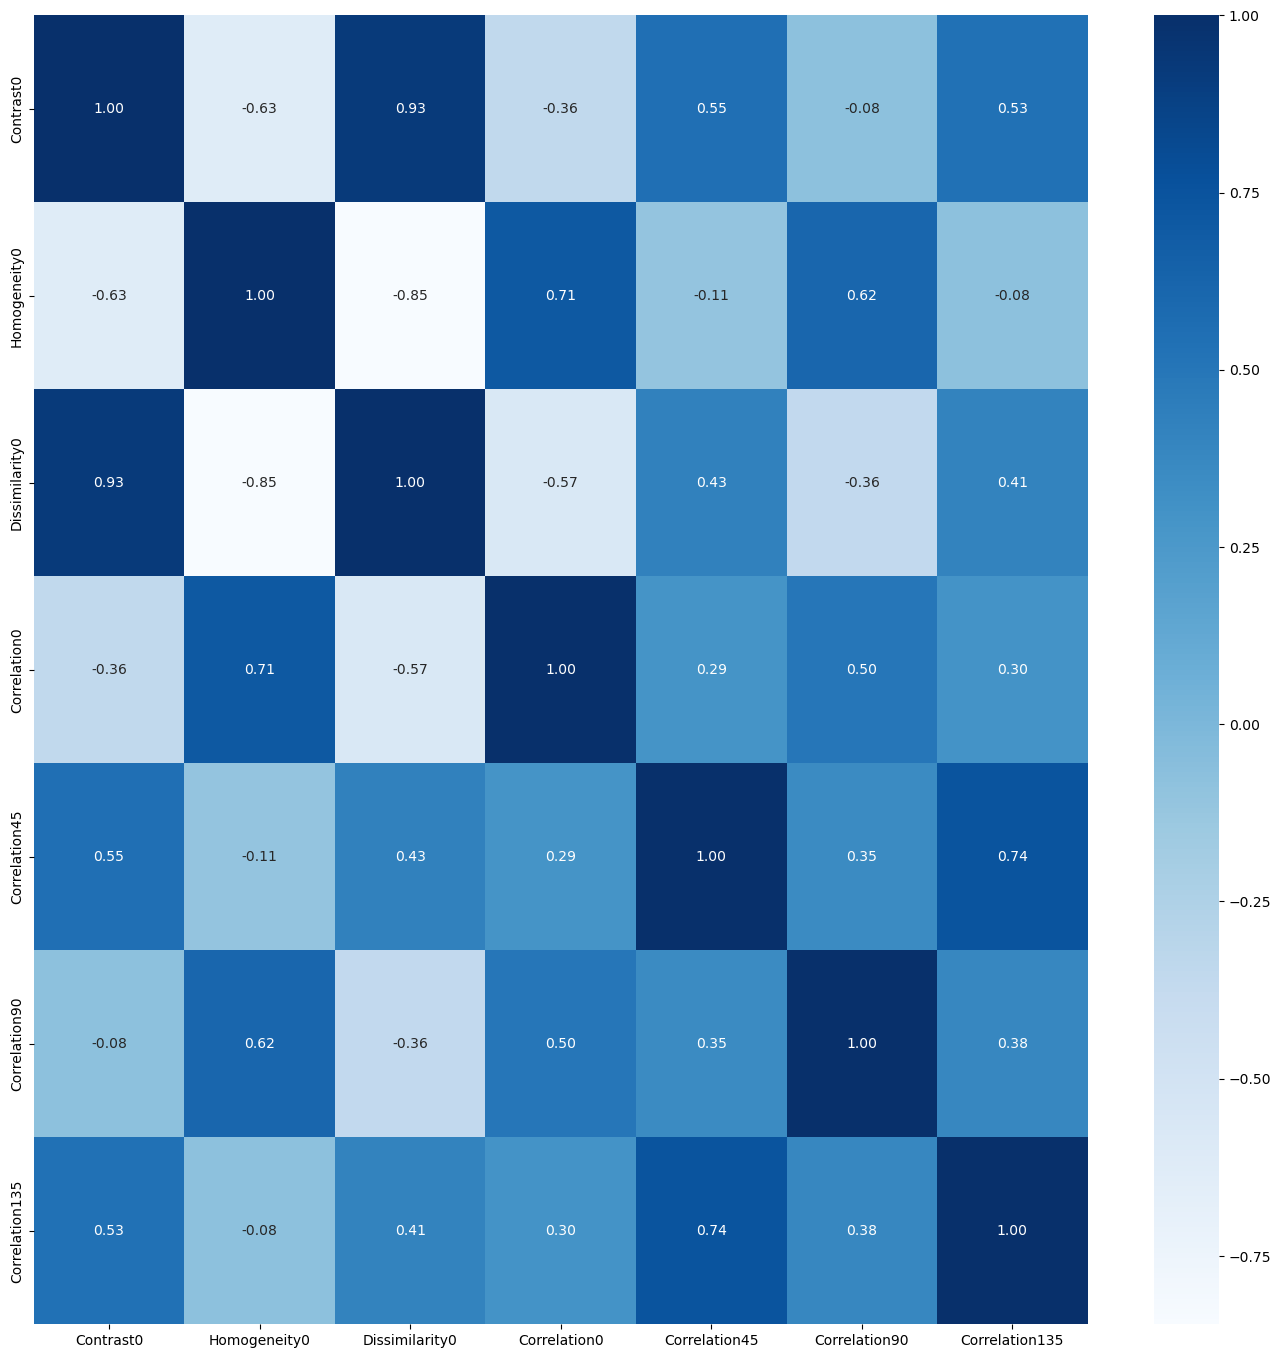

In [92]:

correlation = hasilEkstrak.drop(columns=['Label','Filename']).corr()

threshold = 0.95 # atur threshold ini untuk menentukan seberapa besar korelasi yang ingin disaring
selectionFeature = []
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
	for j in range(i+1, correlation.shape[0]):
		if correlation.iloc[i,j] >= threshold:
			if columns[j]:
				columns[j] = False
select = hasilEkstrak.drop(columns=['Label','Filename']).columns[columns]
x_new = hasilEkstrak[select]
x_new
y = hasilEkstrak['Label']
plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Blues', fmt=".2f")

In [93]:

X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(316, 7)
(80, 7)


In [94]:
# normalisasi mean std
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

In [95]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

# Define classifiers
rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

In [96]:
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred = rf.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = rf.predict(X_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
                                            precision    recall  f1-score   support

                         Grape___Black_rot       0.97      0.93      0.95        70
              Grape___Esca_(Black_Measles)       0.89      0.97      0.93        80
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       0.94      0.90      0.92        83
                           Grape___healthy       1.00      0.98      0.99        83

                                  accuracy                           0.95       316
                                 macro avg       0.95      0.95      0.95       316
                              weighted avg       0.95      0.95      0.95       316

[[65  3  2  0]
 [ 1 78  1  0]
 [ 1  7 75  0]
 [ 0  0  2 81]]
Accuracy: 0.9462025316455697

------Testing Set------
                                            precision    recall  f1-score   support

                         Grape___Black_rot       0.62      0.52      0.57        29
              Gr

In [97]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = svm.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = svm.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
                                            precision    recall  f1-score   support

                         Grape___Black_rot       0.65      0.63      0.64        70
              Grape___Esca_(Black_Measles)       0.60      0.81      0.69        80
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       0.64      0.41      0.50        83
                           Grape___healthy       0.85      0.89      0.87        83

                                  accuracy                           0.69       316
                                 macro avg       0.69      0.69      0.67       316
                              weighted avg       0.69      0.69      0.68       316

[[44 10 10  6]
 [ 7 65  5  3]
 [13 32 34  4]
 [ 4  1  4 74]]
Accuracy: 0.6867088607594937

------Testing Set------
                                            precision    recall  f1-score   support

                         Grape___Black_rot       0.79      0.52      0.62        29
              G

In [98]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = knn.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = knn.predict(X_test)
generateClassificationReport( y_test, y_pred)



------Training Set------
                                            precision    recall  f1-score   support

                         Grape___Black_rot       0.64      0.79      0.71        70
              Grape___Esca_(Black_Measles)       0.69      0.84      0.76        80
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       0.80      0.45      0.57        83
                           Grape___healthy       0.86      0.90      0.88        83

                                  accuracy                           0.74       316
                                 macro avg       0.75      0.74      0.73       316
                              weighted avg       0.75      0.74      0.73       316

[[55  6  5  4]
 [ 7 67  1  5]
 [19 24 37  3]
 [ 5  0  3 75]]
Accuracy: 0.740506329113924

------Testing Set------
                                            precision    recall  f1-score   support

                         Grape___Black_rot       0.57      0.69      0.62        29
              Gr

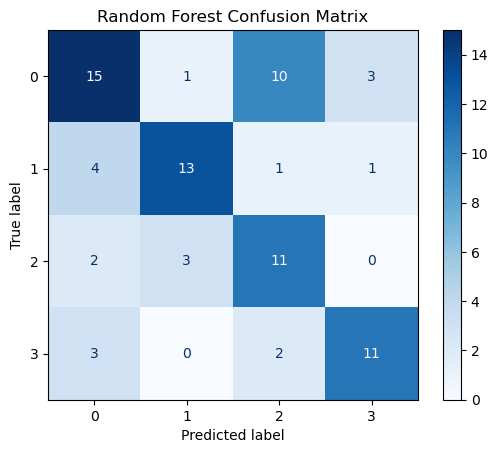

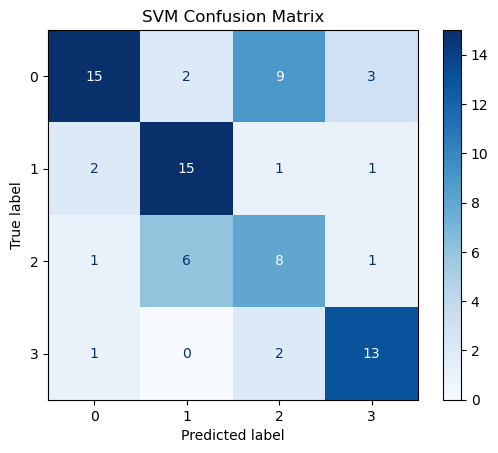

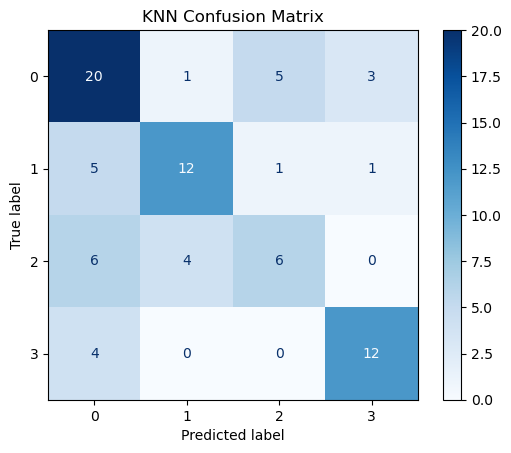

In [99]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")